# The Game of Life

On each square, there may or may not live an individual. A live individual is represented by  a 1, or a blue square. The absence of an individual is represented by a 0, or a light gray square.

At each time step:
1. The total number of live individuals in the nine-cell neighborhood of a given cell is counted.
2. If that number is greater than 3, an individual at that cell dies.
3. If the number is 1 or 0, an individual at that cell dies.
4. A new individual is born on an empty cell only if there are three live neighbors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

In [2]:
def count_neighbors(array, cell):
    count_neighbors = 0

    #Set all 8 possible neighbors and the 1 central cell.
    moore_neighbors = ((-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1))

    #Print neighbors
    for neighbor in moore_neighbors:
        x_adj = cell[0] + neighbor[0]
        y_adj = cell[1] + neighbor[1]

        #Determine if at x-borders
        if x_adj < 0 or x_adj >= array.shape[0]:
            over_x_border = True
        else:
            over_x_border = False

        #Determine if at y-borders
        if y_adj < 0 or y_adj >= array.shape[1]:
            over_y_border = True
        else:
            over_y_border = False

        if over_x_border == False and over_y_border == False:
            count_neighbors += array[x_adj, y_adj]

    return count_neighbors

In [3]:
def iterate_through_grid(grid):
    test_grid = np.copy(grid)
    
    n, m = grid.shape
    
    for row in np.arange(0, n):
        for col in np.arange(0, m):

            count = count_neighbors(grid, (row, col))

            #If cell has a living individual and the nine-cell neighborgood contains more than 3 individuals, the individual
            #at the cell dies.
            if grid[row, col] == 1 and count > 3:
                test_grid[row, col] = 0

            #If an individual is the only individual in their nine-cell neighborhood, the individual at the cell dies.
            if grid[row, col] == 1 and (count <= 1):
                test_grid[row, col] = 0

            #If no individual is living at the cell, but the nine-cell neighborhood contains exactly 3 individuals,
            #then an individual is born at the cell.
            if grid[row, col] == 0 and count == 3:
                test_grid[row, col] = 1

    return test_grid

In [4]:
np.random.seed(1)
start_grid = np.random.randint(low=0, high=2, size=(100,100))

iterations = 10

for i in range(iterations):
    if i == 0:
        end_grid = iterate_through_grid(np.copy(start_grid))
    else:
        inter_grid = np.copy(end_grid)
        end_grid = iterate_through_grid(np.copy(inter_grid))

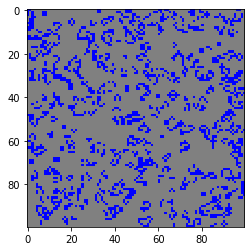

In [5]:
fig, ax = plt.subplots()
ax.imshow(end_grid, cmap=colors.ListedColormap(['grey','blue']))

plt.show()